In [28]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
bus_stops_df = pd.read_csv('Stops_Cleaned/bus_stops.csv')
subway_stops_df = pd.read_csv('Stops_Cleaned/subway_stops.csv')
streetcar_stops_df = pd.read_csv('Stops_Cleaned/streetcar_stops.csv')
streets_cleaned = gpd.read_file('Road_Cleaned2/split_roads2.shp')

In [30]:
bus_stops_gdf = gpd.GeoDataFrame(bus_stops_df, geometry=gpd.points_from_xy(bus_stops_df.stop_lon, bus_stops_df.stop_lat), crs="EPSG: 4326")
subway_stops_gdf = gpd.GeoDataFrame(subway_stops_df, geometry=gpd.points_from_xy(subway_stops_df.stop_lon, subway_stops_df.stop_lat), crs="EPSG: 4326")
streetcar_stops_gdf = gpd.GeoDataFrame(streetcar_stops_df, geometry=gpd.points_from_xy(streetcar_stops_df.stop_lon, streetcar_stops_df.stop_lat), crs="EPSG: 4326")

### 1. How many transportation stops each road has? (Within Street)

First, I'd like to use nearest function to know the number of stops along the street

LINEARID is unique value, so I will use this as streets ID

In [33]:
streets_cleaned = streets_cleaned.to_crs(epsg=3857)

In [34]:
streets_cleaned.head()

LINEARID           FULLNAME RTTYP  MTFCC  NEWID  \
0  1104485402227  State Rte 138 Spr     S  S1200      1   
1  1104485402227  State Rte 138 Spr     S  S1200      2   
2  1104485402227  State Rte 138 Spr     S  S1200      3   
3  1104485402227  State Rte 138 Spr     S  S1200      4   
4  1104485402227  State Rte 138 Spr     S  S1200      5   

                                            geometry  
0  LINESTRING (-9390291.192 3965837.448, -9390556...  
1  LINESTRING (-9390556.578 3965892.867, -9390644...  
2  LINESTRING (-9390644.186 3965915.436, -9390746...  
3  LINESTRING (-9390958.218 3966027.211, -9391129...  
4  LINESTRING (-9391129.094 3966118.822, -9391217...

In [36]:
bus_stops_gdf = bus_stops_gdf.to_crs(epsg=3857)
subway_stops_gdf = subway_stops_gdf.to_crs(epsg=3857)
streetcar_stops_gdf = streetcar_stops_gdf.to_crs(epsg=3857)

Offset streets and give them unique id (Right and Left) apply 0.1m

In [37]:
streets_cleanedR = streets_cleaned.copy()
streets_cleanedR['geometry'] = streets_cleanedR['geometry'].apply(lambda x: x.offset_curve(0.1))
streets_cleanedR['NEWID'] = streets_cleanedR['NEWID'].apply(lambda x: f"{x}R")
streets_cleanedR.head()

LINEARID           FULLNAME RTTYP  MTFCC NEWID  \
0  1104485402227  State Rte 138 Spr     S  S1200    1R   
1  1104485402227  State Rte 138 Spr     S  S1200    2R   
2  1104485402227  State Rte 138 Spr     S  S1200    3R   
3  1104485402227  State Rte 138 Spr     S  S1200    4R   
4  1104485402227  State Rte 138 Spr     S  S1200    5R   

                                            geometry  
0  LINESTRING (-9390291.212 3965837.350, -9390556...  
1  LINESTRING (-9390556.602 3965892.770, -9390644...  
2  LINESTRING (-9390644.210 3965915.339, -9390746...  
3  LINESTRING (-9390958.266 3966027.123, -9391129...  
4  LINESTRING (-9391129.124 3966118.726, -9391217...

In [38]:
streets_cleanedL = streets_cleaned.copy()
streets_cleanedL['geometry'] = streets_cleanedL['geometry'].apply(lambda x: x.offset_curve(-0.1))
streets_cleanedL['NEWID'] = streets_cleanedL['NEWID'].apply(lambda x: f"{x}L")
streets_cleanedL.head()

LINEARID           FULLNAME RTTYP  MTFCC NEWID  \
0  1104485402227  State Rte 138 Spr     S  S1200    1L   
1  1104485402227  State Rte 138 Spr     S  S1200    2L   
2  1104485402227  State Rte 138 Spr     S  S1200    3L   
3  1104485402227  State Rte 138 Spr     S  S1200    4L   
4  1104485402227  State Rte 138 Spr     S  S1200    5L   

                                            geometry  
0  LINESTRING (-9390291.171 3965837.545, -9390556...  
1  LINESTRING (-9390556.553 3965892.964, -9390644...  
2  LINESTRING (-9390644.162 3965915.533, -9390746...  
3  LINESTRING (-9390958.171 3966027.299, -9391129...  
4  LINESTRING (-9391129.063 3966118.917, -9391217...

In [39]:
offset_streets = pd.concat([streets_cleanedL, streets_cleanedR], ignore_index=True)
offset_streets = offset_streets.sort_values(by='FULLNAME', ascending=False)
offset_streets

LINEARID        FULLNAME RTTYP  MTFCC   NEWID  \
70848    1103566441007         Zoya Ct     M  S1400  70849L   
163108   1103566441007         Zoya Ct     M  S1400  70849R   
163107   1103566441007         Zoya Ct     M  S1400  70848R   
70847    1103566441007         Zoya Ct     M  S1400  70848L   
109333    110166897773  Zonolite Rd NE     M  S1400  17074R   
...                ...             ...   ...    ...     ...   
184459    110458562402            None  None  S1400  92200R   
184470  11012812949026            None  None  S1750  92211R   
184474    110458562325            None  None  S1400  92215R   
184480  11012812949530            None  None  S1780  92221R   
184511    110342526728            None  None  S1400  92252R   

                                                 geometry  
70848   LINESTRING (-9411988.258 3983941.662, -9411979...  
163108  LINESTRING (-9411988.245 3983941.862, -9411979...  
163107  LINESTRING (-9412102.734 3983987.447, -9412083...  
70847   LINESTRING (-9412102.863 3983987.294, -9412083...  
109333  LINESTRING (-9389245.867 4002949.105, -9389088...  
...                                                   ...  
184459  LINESTRING (-9373821.867 4024119.938, -9373795...  
184470  LINESTRING (-9373030.351 4018696.810, -9373020...  
184474  LINESTRING (-9376551.718 4018316.478, -9376511...  
184480  LINESTRING (-9378821.217 4017243.317, -9378840...  
184511  LINESTRING (-9368488.168 3976909.017, -9368496...  

[184520 rows x 6 columns]

<Axes: >

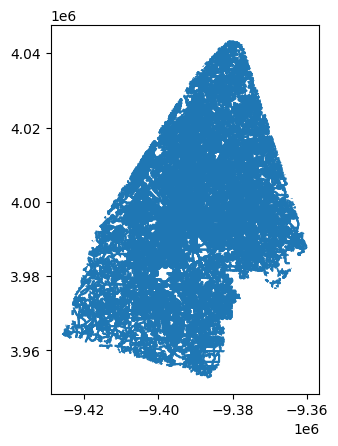

In [40]:
offset_streets.plot()

To make calculation faster, lets make buffer from busstops point and calculate for intersects

In [41]:
bus_stops_gdf2 = bus_stops_gdf.copy()

# 1. Create a 50m buffer around each bus stop point
bus_stops_gdf2['buffer'] = bus_stops_gdf2.geometry.buffer(100)

In [42]:
# 2. For each bus stop, calculate the nearest road within the buffer
def find_nearest_road(bus_stop):
    # Filter streets that intersect with the 50m buffer of the bus stop
    possible_streets = offset_streets[offset_streets.geometry.intersects(bus_stop['buffer'])]
    
    # If no streets are found within the buffer, return None
    if possible_streets.empty:
        return None
    
    # Find the street with the minimum distance to the bus stop geometry
    nearest_road_id = possible_streets.distance(bus_stop.geometry).idxmin()
    
    # Return the NEWID of the nearest street
    return offset_streets.loc[nearest_road_id, 'NEWID']

# 3. Add a new column 'nearest_road_id' containing the LINEARID of the nearest road for each bus stop
bus_stops_gdf2['nearest_road_id'] = bus_stops_gdf2.apply(find_nearest_road, axis=1)

# 4. Drop the buffer column if it's no longer needed
bus_stops_gdf2 = bus_stops_gdf2.drop(columns=['buffer'])

In [44]:
bus_stops_gdf3 = bus_stops_gdf2.drop(columns=['zone_id','location_type','parent_station','stop_timezone','route_type','stop_lon','stop_lat','stop_desc'])
bus_stops_gdf3

stop_id  stop_code                      stop_name  stop_url  \
0          355     906311    HOWELL MILL RD @ KIPLING DR       NaN   
1         9008     902632  N MAIN ST @ WINTHROPE PARK DR       NaN   
2         9012     902630                N MAIN ST @ 379       NaN   
3         9016     902631                N MAIN ST @ 301       NaN   
4         9020     900005      N MAIN ST @ PINE GROVE DR       NaN   
...        ...        ...                            ...       ...   
8810  99974332     213843      ANVIL BLOCK RD @ S 1ST ST       NaN   
8811  99974333     213844  ANVIL BLOCK RD @ MORELAND AVE       NaN   
8812  99974334     213839   OLD DIXIE RD @ SOUTHPOINT DR       NaN   
8813  99974335     213840   OLD DIXIE RD @ SOUTHPOINT DR       NaN   
8814  99974336     213841     OLD DIXIE RD @ CENTRAL AVE       NaN   

      wheelchair_boarding station_type                          geometry  \
0                     1.0          Bus  POINT (-9397009.657 4003792.399)   
1                     1.0          Bus  POINT (-9383589.425 4040825.358)   
2                     1.0          Bus  POINT (-9383671.690 4040332.191)   
3                     1.0          Bus  POINT (-9383649.203 4040067.941)   
4                     1.0          Bus  POINT (-9383632.728 4039857.191)   
...                   ...          ...                               ...   
8810                  1.0          Bus  POINT (-9386159.680 3978580.675)   
8811                  0.0          Bus  POINT (-9385700.042 3979008.218)   
8812                  1.0          Bus  POINT (-9393820.131 3979236.435)   
8813                  0.0          Bus  POINT (-9393800.205 3979271.063)   
8814                  1.0          Bus  POINT (-9393606.064 3978484.286)   

     nearest_road_id  
0             76344R  
1             62468L  
2             62466L  
3             62466L  
4             62465L  
...              ...  
8810           2269L  
8811           2272L  
8812          11073L  
8813          11073R  
8814          11076R  

[8815 rows x 8 columns]

There are some NA value...

In [45]:
none_count = bus_stops_gdf3['nearest_road_id'].isna().sum()
none_count

67

### Let's Check if I did well

Ok. It seems some NA values are came from boundary problems. Need to fix boundary (Maybe more bigger)

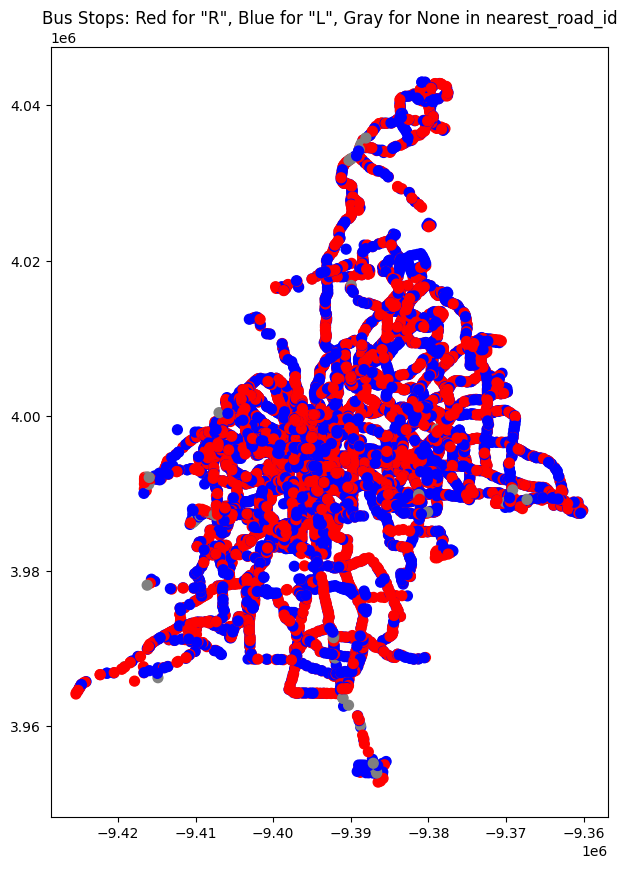

In [46]:
bus_stops_gdf3['color'] = bus_stops_gdf3['nearest_road_id'].apply(
    lambda x: 'red' if isinstance(x, str) and x.endswith('R') else ('blue' if isinstance(x, str) and x.endswith('L') else 'gray')
)

fig, ax = plt.subplots(figsize=(10, 10))

bus_stops_gdf3.plot(ax=ax, color=bus_stops_gdf3['color'], markersize=50, legend=True)

plt.title('Bus Stops: Red for "R", Blue for "L", Gray for None in nearest_road_id')
plt.show()

In [47]:
bus_stops_gdf3.explore(
    color=bus_stops_gdf3['color'],
    tooltip=['stop_id', 'stop_name', 'nearest_road_id'],
    marker_kwds={'radius': 5}
)

Let's count busstops for each streets

In [48]:
bus_stop_counts = bus_stops_gdf3.groupby('nearest_road_id').size().reset_index(name='bus_stops_count')
bus_stop_counts.sort_values(by='bus_stops_count', ascending=False)

nearest_road_id  bus_stops_count
5137          62009R                6
845           21145L                6
4071          55622R                6
532           20335R                5
837           21131L                5
...              ...              ...
2697           3954R                1
2696           3951R                1
2695           3950R                1
2694           3947R                1
7369              9R                1

[7370 rows x 2 columns]

Looks good

In [50]:
filtered_rows = offset_streets[offset_streets['NEWID'].isin(['62009R', '21145L'])]
filtered_rows

LINEARID                 FULLNAME RTTYP  MTFCC   NEWID  \
21144   1106087866956  S Stone Mtn Lithonia Rd     M  S1400  21145L   
154268  1101019219094             Harbin Rd SW     M  S1400  62009R   

                                                 geometry  
21144   LINESTRING (-9365053.882 3994428.768, -9364981...  
154268  LINESTRING (-9404678.802 3991258.649, -9404679...

In [51]:
filtered_rows.explore()

: 